# t-SNE

Just to ilustrate who t-SNE works using text data

In [74]:
from os import listdir
from os.path import join
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [75]:
def get_data(docpath, nfeatures=100, method=1, labels=1):
    """
    Transforms the documents in a dataset
    """

    docs = sorted(listdir(docpath))[1:]

    if labels == 1: # Dataset labels
        labs = [v[:2] for v in docs]
    else: # Individual authors
        labs = [v[2:-2] for v in docs]
    ulabs = sorted(list(set(labs)))
    dlabs = {}
    for ul, v  in zip(ulabs, range(len(ulabs))):
        dlabs[ul]=v
    labels = [dlabs[v] for v in labs]

    pdocs = [join(docpath, f) for f in docs]

    if method == 1: # Features are word counts
        cvec = CountVectorizer(input='filename', stop_words='english', max_features=nfeatures)
    elif method == 2: # Features are TF-IDF
        cvec = TfidfVectorizer(input='filename', stop_words='english', max_features=nfeatures)
    elif method == 3: # Features are word occurence
        cvec = TfidfVectorizer(input='filename', stop_words='english', max_features=nfeatures, binary=True, use_idf=False, norm=False)

    authors = cvec.fit_transform(pdocs)
    return authors.toarray(), labels

You can generate different datasets using 'Auth1' or 'Auth2' and changing the way the attributes are generated from the text

In [104]:
docpath = '/home/bejar/Data/authors/Auth1/'

data, labels = get_data(docpath, nfeatures=100, method=2, labels=1)

Let's try t-SNE for this data. See the documentation in http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=200, early_exaggeration=5, perplexity=20)

res = tsne.fit_transform(data)


<IPython.core.display.Javascript object>


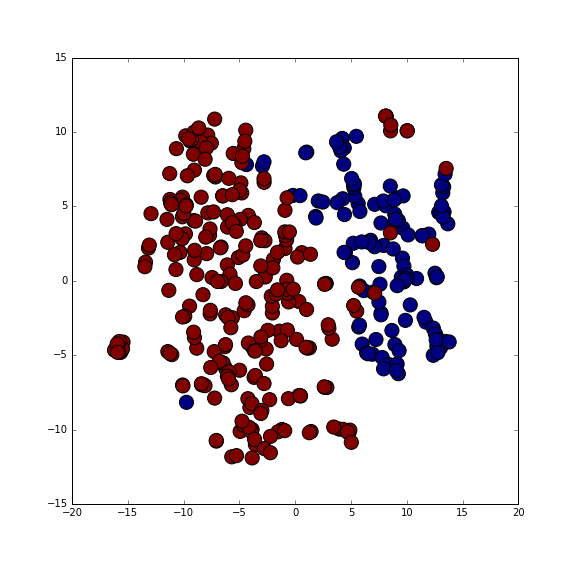

In [106]:
fig = plt.figure(figsize=(8,8))
plt.scatter(res[:, 0], res[:, 1], c=labels,s=200)

In [107]:
tsne = TSNE(n_components=3, learning_rate=200, early_exaggeration=5, perplexity=15)

res = tsne.fit_transform(data)



<IPython.core.display.Javascript object>


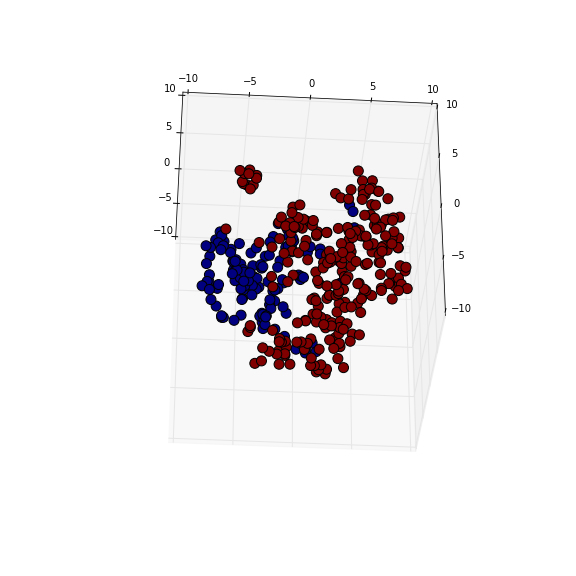

In [108]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(180, 60)
plt.scatter(res[:, 0], res[:, 1], zs=res[:, 2], depthshade=False, c=labels,s=100)